<a href="https://colab.research.google.com/github/keshav-b/ML-DL-stuff/blob/master/AutoEncoders/Convolutional_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [ ]:
# DATA

transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

In [3]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [4]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape

torch.Size([64, 1, 28, 28])

In [5]:
class ConvAutoencoder(nn.Module):
  def __init__(self):
    super(ConvAutoencoder, self).__init__()
    self.conv1 = nn.Conv2d(1, 16, 3, stride=2, padding=1)
    self.conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
    self.conv3 = nn.Conv2d(32, 64, 7)

    self.t_conv1 = nn.ConvTranspose2d(64, 32, 7)
    self.t_conv2 = nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1)
    self.t_conv3 = nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1)


  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    
    x = F.relu(self.t_conv1(x))
    x = F.relu(self.t_conv2(x))
    x = F.sigmoid(self.t_conv3(x))
  
    return x

In [6]:
model = ConvAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [7]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'gpu'
    return device

device = get_device()
print(device)
model.to(device)

cuda:0


ConvAutoencoder(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  (t_conv1): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
  (t_conv2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (t_conv3): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
)

In [8]:
num_epochs = 20

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.to(device)

        optimizer.zero_grad()
        output = model(img)
        

        loss = criterion(output, img)
        loss.backward()

        optimizer.step()
        

    print('Epoch: ', epoch+1, ' =====> Loss: ', loss.item())
    

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch:  1  =====> Loss:  0.07976958155632019
Epoch:  2  =====> Loss:  0.06849028170108795
Epoch:  3  =====> Loss:  0.06719329208135605
Epoch:  4  =====> Loss:  0.06674908846616745
Epoch:  5  =====> Loss:  0.06648143380880356
Epoch:  6  =====> Loss:  0.06627903878688812
Epoch:  7  =====> Loss:  0.06609903275966644
Epoch:  8  =====> Loss:  0.06590502709150314
Epoch:  9  =====> Loss:  0.06562376767396927
Epoch:  10  =====> Loss:  0.06483840197324753
Epoch:  11  =====> Loss:  0.06265711784362793
Epoch:  12  =====> Loss:  0.058608293533325195
Epoch:  13  =====> Loss:  0.05187022686004639
Epoch:  14  =====> Loss:  0.04586489126086235
Epoch:  15  =====> Loss:  0.0416276678442955
Epoch:  16  =====> Loss:  0.038472022861242294
Epoch:  17  =====> Loss:  0.03592417761683464
Epoch:  18  =====> Loss:  0.033742547035217285
Epoch:  19  =====> Loss:  0.03192228451371193
Epoch:  20  =====> Loss:  0.030317207798361778


In [9]:
count = 1
with torch.no_grad():
  for data in test_loader:
    images, _ = data
    images = images.to(device)
    outputs = model(images)
    if count == 1: # for sample display
      test_true = images
      test_pref = outputs
      count += 1 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


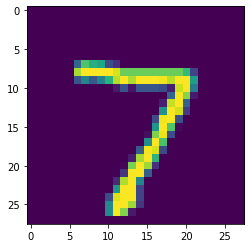

In [10]:
test_true = test_true.cpu()
test_true = np.asarray(test_true) 
plt.imshow(test_true[0][0])

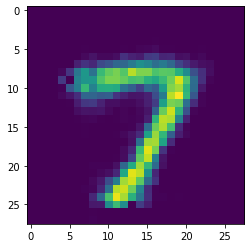

In [11]:
test_true = test_pref.cpu()
test_true = np.asarray(test_true) 
plt.imshow(test_true[0][0])